In [90]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
import numpy as np
import os
import data_utils
import pickle
import attacks
import random
from keras.models import load_model

import greedy_utils

In [92]:
TOKENIZER_PATH = 'tokenizer.pickle'
TEXT_DATA_DIR = '20_newsgroup/'
MODEL_PATH = '20news_model.h5'

In [93]:
tokenizer, inverse_tokenizer = data_utils.load_tokenizer(TOKENIZER_PATH)
model = load_model(MODEL_PATH)
labels =  list(sorted(os.listdir(TEXT_DATA_DIR)))

In [94]:
sample_file, true_label = data_utils.pick_random_file(TEXT_DATA_DIR)
file_text = data_utils.load_textfile(sample_file)
file_features = data_utils.process_text(tokenizer, file_text)

In [95]:
pred_scores = model.predict(file_features)
orig_prediction = np.argmax(pred_scores[0])
print('TrueLabel = %s' %true_label)
print('Predicted "%s" with %f .' %(labels[orig_prediction], pred_scores[0][orig_prediction]))

TrueLabel = rec.sport.baseball
Predicted "rec.sport.baseball" with 0.172527 .


## Randomly choose a word and replace with its typo

In [96]:
import find_most_similar_word
import string
delset = string.punctuation
remove_punc_text = file_text.translate(str.maketrans('','',string.punctuation))
words = remove_punc_text.split();

In [97]:
y_orig = []
orig_pred = orig_prediction
iter_idx = 0
Attacked = False
changed = [False]*len(words)
alphabets = "abcdefghijklmnopqrstuvwxyz"



while Attacked == False:
    iter_idx += 1;
    word_idx = np.random.choice(len(words))
    new_word = words[word_idx];
    new_word = [x for x in new_word]
    char_idx = np.random.choice(len(new_word));
    new_word[char_idx] = alphabets[np.random.choice(26)];
    new_word = ''.join(new_word)
    words[word_idx] = new_word;
    modified_text = ' '.join(words)
    file_features = data_utils.process_text(tokenizer, modified_text)
    pred_scores = model.predict(file_features)
    new_pred = np.argmax(pred_scores)
    y_orig.append(pred_scores[0][orig_pred])
    if new_pred != orig_pred:
        Attacked = True
        break 
    elif iter_idx > 2000:
        break
    words = modified_text.split();
        
if Attacked:
    print("Attack successful after : %d iterations" %(iter_idx))
    print("Original class \"%s\" - New class: \"%s\"" %(labels[orig_pred], labels[new_pred]))
else:
    print("Fail attacking after : %d iterations" %(iter_idx))


Attack successful after : 228 iterations
Original class "rec.sport.baseball" - New class: "comp.windows.x"


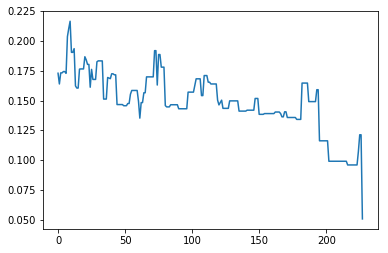

In [98]:
plt.plot(range(len(y_orig)), y_orig)